In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

In C:\Users\hyoun\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hyoun\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hyoun\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\hyoun\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hyoun\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

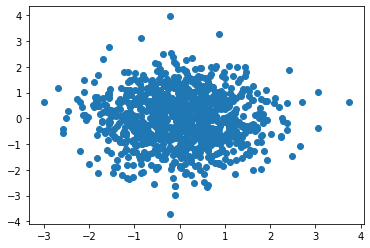

In [4]:
points = [np.random.randn(2) for _ in range(1000)]

X = []
Y = []
for p in points:
    X.append(p[0])
    Y.append(p[1])
plt.scatter(X,Y)
plt.show()

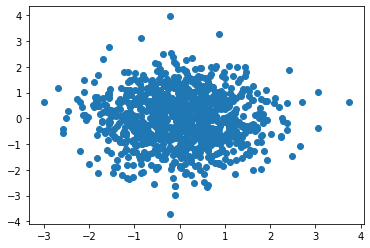

In [5]:
plt.scatter(*zip(*points))

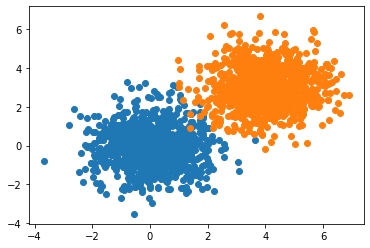

In [6]:
points1 = [np.random.randn(2) for _ in range(1000)]
points2 = [np.random.randn(2) + np.array([4,3]) for _ in range(1000)] # x축 4이동 y축 3이동시킴

plt.scatter(*zip(*points1))
plt.scatter(*zip(*points2))


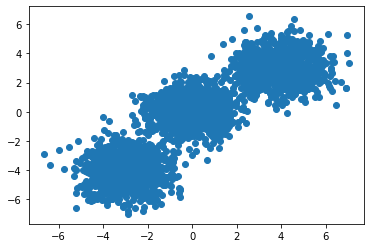

In [7]:
points = [np.random.randn(2) for _ in range(1000)]
points.extend([np.random.randn(2) + np.array([4,3]) for _ in range(1000)]) # x축 4이동 y축 3이동시킴
points.extend([np.random.randn(2) + np.array([-3,-4]) for _ in range(1000)]) # x축 -3이동 y축 -4이동시킴

points = np.array(points)

plt.scatter(*zip(*points))

In [44]:
def assign(p,centroids):
    min_dist_centroids_idx = -1
    min_dist = 9**9
    for i, c in enumerate(centroids):
        dist = np.sum((c-p)**2)
        if min_dist > dist:
            min_dist_centroids_idx = i
            min_dist = dist
                
    return min_dist_centroids_idx

def compute_centroids(assignments, points, k):
    clusters = [[] for _ in range(k)]
        
    for a,p in zip(assignments,points):
        clusters[a].append(p)
        
    return [np.mean(c,axis=0) for c in clusters]
    
def kmeans(k,points):
    
    pre_assignments = []
    
    # 1. random으로 centroid 선택 
    centroids = random.choices(points,k=k)
    
    for epoch in range(10):
        assignments = []
#         for p in points:
#             min_dist_centroids_idx = assign(p,centroids)
#             assignments.append(min_dist_centroids_idx)
        # 2. 각 점마다 가장 가까운 centroid의 cluster에 점 할당 
        assignments = [assign(p,centroids) for p in points]
        
        # 3. cluster의 평균을 구해서 centorid 업데이트 
        centroids = compute_centroids(assignments, points,k)
        
        # 4. cluster가 변했는지 확인하고, 변했으면 계속, 변하지 않았으면 멈춤 
        if assignments == pre_assignments:
            break
        pre_assignments = assignments
        
        print(epoch)
    return assignments, centroids

0
1
2
3
4
5


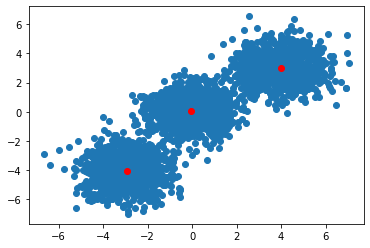

In [45]:
a,c = kmeans(3,points)

plt.scatter(*zip(*points))
plt.scatter(*zip(*c), c = 'red')

0
1
2
3
4
5


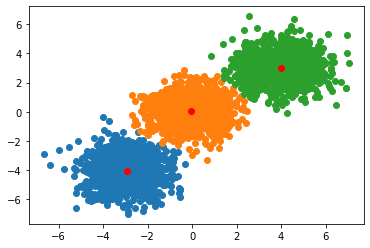

In [46]:
a,c = kmeans(3,points)

clusters = [[] for _ in range(3)]

for aa,p in zip(a, points):
    clusters[aa].append(p)
    
for clst in clusters:
    plt.scatter(*zip(*clst))

plt.scatter(*zip(*c), c = 'red')
plt.show()

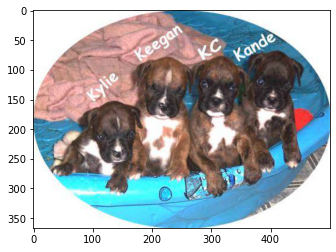

In [47]:
from PIL import Image

img = Image.open("dog.jpg")

width = 200
height = 200* img.height // img.width

img.resize((width,height))

plt.imshow(img)
plt.show()

In [48]:
pixels = np.array(img)
pixels.shape

(367, 500, 3)

In [49]:
pixels = pixels.reshape(367*500,3)
pixels

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

In [50]:
pixels.shape

(183500, 3)

0
1
2


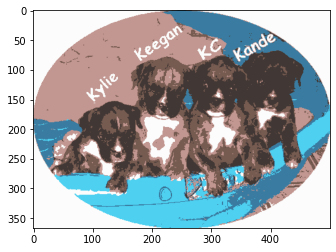

In [54]:
assignments, centroids = kmeans(8,pixels)

for i,a in zip(range(pixels.shape[0]),assignments):
    pixels[i] = centroids[a]
    
pixels = pixels.reshape(367,500,3)
img_remastered = Image.fromarray(pixels,'RGB')

plt.imshow(img_remastered)
plt.show()

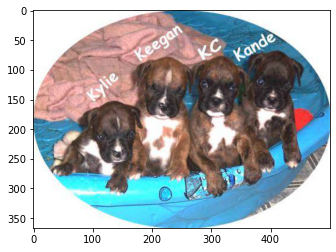

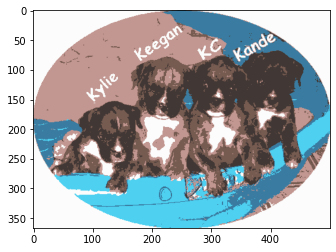

In [56]:
plt.imshow(img)
plt.show()
plt.imshow(img_remastered)
plt.show()

In [9]:
def kmeans(k,points):
    prev_assignment = []
    
    #1. 임의의 k개의 점을 중심으로 선택(forgy)
    centroids = points[np.random.choice(points.shape[0],replace=True,size=k)]
    
    for epoch in range(10):
        # 2. 각 점이 할당될 중심점을 계산
        assignments = [assign(p, centroids, k) for p in points]
        
        # 3. 새로운 centroids 계산
        centroids = compute_centroids(assignments, points, k)
        
        # 4. 클러스터에 변화가 없을경우 종료
        if prev_assignment == assignment:
            break
        prev_assignment = assignment
        
    return assignments, centroids

def assign(point, centroids, k):
    return min(range(k), key=lambda i:np.dot(centroids[i]-point,centroids-point))

def compute_centroids(assignments, points, k):
    vec_sum = [np.zeros(len(points[0])) for _ in range(k)]
    counts = [0] * k
    
    for i, p in zip(assignments, points):
        vec_sum[i] += p
        counts[i] += 1
    
    return [vec_sum[i]/counts[i] if counts[i]>0 else random.choice(points) for i in range(k)]